# Web Scraping Project
## Billboard Decade-End Chats Hot 100 Songs (2010s)

**By**: `Waranchana Ratiruetayawong (Cher)`

**Date**: 25 January 2023

## Part 1: Access to Webpage

In [1]:
#import requests and BeautifulSoup libraries
import requests
from bs4 import BeautifulSoup

In [2]:
#get the HTML using requests
url = 'https://www.billboard.com/charts/decade-end/hot-100/'
response = requests.get(url)

<!DOCTYPE html>

<!--[if IE 6]>
<html id="ie6" lang="en-US">
<![endif]-->
<!--[if IE 7]>
<html id="ie7" lang="en-US">
<![endif]-->
<!--[if IE 8]>
<html id="ie8" lang="en-US">
<![endif]-->
<!--[if !(IE 6) | !(IE 7) | !(IE 8) ]><!-->
<html lang="en-US">
<!--<![endif]-->
<head>
<meta charset="utf-8"/>
<meta content="IE=edge,chrome=1" http-equiv="X-UA-Compatible"/>
<meta content="#ffffff" name="theme-color"/>
<meta content="width=device-width, initial-scale=1.0" name="viewport">
<!-- Add to home screen for iOS -->
<meta content="black-translucent" name="apple-mobile-web-app-status-bar-style"/>
<link href="https://www.billboard.com/wp-content/themes/vip/pmc-billboard-2021/assets/app/icons/apple-touch-icon.png" rel="apple-touch-icon" sizes="180x180"/>
<!-- Tile icons for Windows -->
<meta content="https://www.billboard.com/wp-content/themes/vip/pmc-billboard-2021/assets/app/browserconfig.xml" name="msapplication-config"/>
<meta content="https://www.billboard.com/wp-content/themes/vip/pmc-bil
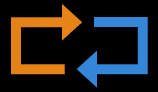

In [3]:
#try reading content of the webpage
content = response.content
soup = BeautifulSoup(content,"html.parser")
soup

In [4]:
#show title of webpage
print(soup.title)

<title>Hot 100 Songs – Billboard</title>


## Part 2: Format Data

In [5]:

#find the HTML tags which store all needed information
bb_top100 = soup.find_all("div",attrs={"class": "o-chart-results-list-row-container"})

#extract data from webpage and create list elements using for loop
top100_10s =[]
for  index, item in enumerate(bb_top100):
    dataframe ={}
    dataframe["no"] = index + 1
    dataframe["song_name"] = (item.find("h3",attrs={"id": "title-of-a-story"})).text.replace('\t', '').replace('\n', '')
    dataframe["artist"] = (item.find_all("span",attrs={"class": "c-label"}))[1].text.replace('\t', '').replace('\n', '')
    dataframe["peak_date"] = (item.find_all("span",attrs={"class": "c-label"}))[5].text.replace('\t', '').replace('\n', '')
    top100_10s.append(dataframe)
top100_10s

[{'no': 1,
  'song_name': 'Uptown Funk!',
  'artist': 'Mark Ronson Featuring Bruno Mars',
  'peak_date': '01/17/2015'},
 {'no': 2,
  'song_name': 'Party Rock Anthem',
  'artist': 'LMFAO Featuring Lauren Bennett & GoonRock',
  'peak_date': '07/16/2011'},
 {'no': 3,
  'song_name': 'Shape Of You',
  'artist': 'Ed Sheeran',
  'peak_date': '01/28/2017'},
 {'no': 4,
  'song_name': 'Closer',
  'artist': 'The Chainsmokers Featuring Halsey',
  'peak_date': '09/03/2016'},
 {'no': 5,
  'song_name': 'Girls Like You',
  'artist': 'Maroon 5 Featuring Cardi B',
  'peak_date': '09/29/2018'},
 {'no': 6,
  'song_name': 'We Found Love',
  'artist': 'Rihanna Featuring Calvin Harris',
  'peak_date': '11/12/2011'},
 {'no': 7,
  'song_name': 'Old Town Road',
  'artist': 'Lil Nas X Featuring Billy Ray Cyrus',
  'peak_date': '04/13/2019'},
 {'no': 8,
  'song_name': 'Somebody That I Used To Know',
  'artist': 'Gotye Featuring Kimbra',
  'peak_date': '04/28/2012'},
 {'no': 9,
  'song_name': 'Despacito',
  'artis

## Part 3: Save Data in a Readable Format

In [6]:
#import pandas and convert list to dataframe
import pandas as pd
df = pd.DataFrame(top100_10s)

#save to .csv file
df.to_csv("billboard_hot_100_songs_2010s.csv",index=False)

In [7]:
#preview dataframe
df.head()

,no,song_name,artist,peak_date
0,1,Uptown Funk!,Mark Ronson Featuring Bruno Mars,01/17/2015
1,2,Party Rock Anthem,LMFAO Featuring Lauren Bennett & GoonRock,07/16/2011
2,3,Shape Of You,Ed Sheeran,01/28/2017
3,4,Closer,The Chainsmokers Featuring Halsey,09/03/2016
4,5,Girls Like You,Maroon 5 Featuring Cardi B,09/29/2018


## Simple Analysis 
 - Q1: Which year has the most top songs?
 - Q2: According to Question 1, what songs are those?
 - Q3: How many Bruno Mars's songs in the chart?

In [8]:
#see dataframe information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   no         100 non-null    int64 
 1   song_name  100 non-null    object
 2   artist     100 non-null    object
 3   peak_date  100 non-null    object
dtypes: int64(1), object(3)
memory usage: 3.2+ KB


In [9]:
#convert peak_date coloumn to date type
df['peak_date'] = pd.to_datetime(df['peak_date'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   no         100 non-null    int64         
 1   song_name  100 non-null    object        
 2   artist     100 non-null    object        
 3   peak_date  100 non-null    datetime64[ns]
dtypes: datetime64[ns](1), int64(1), object(2)
memory usage: 3.2+ KB


### Q1: Which year has the most top songs?

In [10]:
#count top songs each year
a = df['peak_date'].dt.year.value_counts().sort_index()

#plot bar chart
a.plot.bar(color='salmon')

<AxesSubplot:>

Year 2014, 2015, and 2018 have the most top songs in decades which are 12 songs. 

### Q2: According to Question 1, what songs are those?

In [11]:
#filter rows in year 2014, 2015, and 2018
songs_14_15_18 = df[(df['peak_date'].dt.year == 2014)\
                    | (df['peak_date'].dt.year == 2015)\
                    | (df['peak_date'].dt.year == 2018)].reset_index(drop=True)

#add new column as year
songs_14_15_18['year'] = songs_14_15_18['peak_date'].dt.year

songs_14_15_18[['year','song_name','artist']].sort_values('year').reset_index(drop=True)

,year,song_name,artist
0,2014,Take Me To Church,Hozier
1,2014,Timber,Pitbull Featuring Ke$ha
2,2014,All About That Bass,Meghan Trainor
3,2014,Rude,MAGIC!
4,2014,Happy,Pharrell Williams
5,2014,Dark Horse,Katy Perry Featuring Juicy J
6,2014,Stay With Me,Sam Smith
7,2014,All Of Me,John Legend
8,2014,Shake It Off,Taylor Swift
9,2014,Counting Stars,OneRepublic


### Q3: How many Bruno Mars's songs in the chart?

In [38]:
#filter rows which have 'Bruno Mars' in artist column

#create empty list
results = []

#add data that include word 'Bruno Mars' in artist column using for loop
for index, i in enumerate(df['artist']):
    if 'Bruno Mars' in i:
        results.append(df.loc[index])

#convert results to dataframe format
bnm = pd.DataFrame(results)

#show only date in peak_date column (if not, time will be included)
bnm['peak_date'] = bnm['peak_date'].dt.date

#show data
bnm.reset_index(drop=True)

,no,song_name,artist,peak_date
0,1,Uptown Funk!,Mark Ronson Featuring Bruno Mars,2015-01-17
1,22,Just The Way You Are,Bruno Mars,2010-10-02
2,30,That's What I Like,Bruno Mars,2017-05-13
3,45,Locked Out Of Heaven,Bruno Mars,2012-12-22
4,54,Grenade,Bruno Mars,2011-01-08


There are 4 Bruno Mars's songs and 1 song he featured in.